In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('USA_Housing.csv')

In [8]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [17]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [13]:
y=df['Price']

In [3]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,random_state=101)#split data into training and test sets

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train,y_train)#Train model on training data 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(lm.intercept_) #intercept of the model 

-2640159.796852678


In [25]:
lm.coef_ #what do the coefficents mean?
#5 variables so 5 coefficents 
#y= m1x1+m2x2+m3x3+m4x4+m5x5+c (all the m is the coeffocents )

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [27]:
X_train.columns #check of trainingset that has actual input

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [28]:
#create a coefficent datafram
cdf = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coeff'])

In [29]:
cdf #this data is small numbers 

Coeff
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

In [32]:
predictions = lm.predict(X_test)

In [33]:
predictions #would be 60% since we split the data set by 40% above 

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140899, 1914519.5417888 ])

In [36]:
predictions.shape

(2000,)

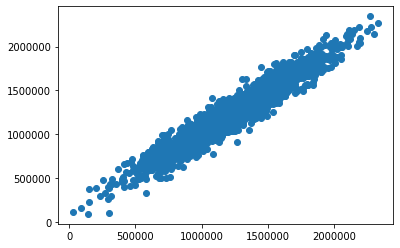

In [41]:
plt.scatter(y_test,predictions) #more datat have more accuratley can make predictions 

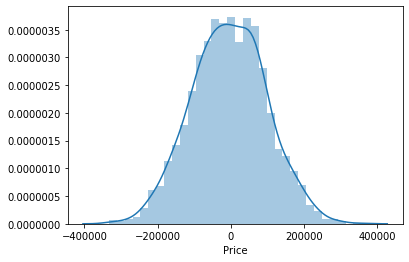

In [43]:
#check the distribtuion of residuls
sns.distplot((y_test- predictions))

In [44]:
from sklearn import metrics

In [45]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914948

In [47]:
metrics.mean_squared_error(y_test,predictions)

10460958907.208988

In [48]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922290901